
# Project:  Housing Prices



In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd


# Load the Boston housing dataset
house_p = pd.read_csv('housing.csv')

    
# Success
print("Boston housing dataset has",house_p.shape[0],"data points with",house_p.shape[1],"variables each.")
house_p.head()

Boston housing dataset has 489 data points with 4 variables each.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

# answer:

In [2]:
%load_ext sql

In [3]:
%sql ibm_db_sa://vvc90062:j2qPN1zj4vXhHFYu@55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31929/BLUDB?security=SSL

In [4]:
%sql drop table house_p

 * ibm_db_sa://vvc90062:***@55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31929/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "VVC90062.HOUSE_P" is an undefined name.  SQLSTATE=42704\r SQLCODE=-204
[SQL: drop table house_p]
(Background on this error at: http://sqlalche.me/e/13/f405)


In [5]:
%sql --persist house_p  # in one insturction will convert the DF to sql table with the same name

 * ibm_db_sa://vvc90062:***@55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31929/BLUDB


'Persisted house_p'

In [6]:
%sql SELECT MAX(MEDV) FROM house_p;

 * ibm_db_sa://vvc90062:***@55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31929/BLUDB
Done.


1
1024800.0


# Task 1:
* use sql ,pandas ,matplot,seaborn to find a relation between house prices and the rest of features
* find a relation between house price and nmber of rooms
* find relation between services(like number of schools) and house price
* find a relation between house price and neighborhood considered "lower class" (working poor).

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

# ROOMS VS PRICE

In [18]:
#use many scatterplots as you need to find these relations
rooms_vs_price=%sql SELECT RM as rooms,MEDV as price FROM house_p;
df1 = rooms_vs_price.DataFrame()
df1.head()

 * ibm_db_sa://vvc90062:***@55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31929/BLUDB
Done.


,rooms,price
0,6.575,504000.0
1,6.421,453600.0
2,7.185,728700.0
3,6.998,701400.0
4,7.147,760200.0


In [19]:
df1.corr()

,rooms,price
rooms,1.000000,0.697209
price,0.697209,1.000000


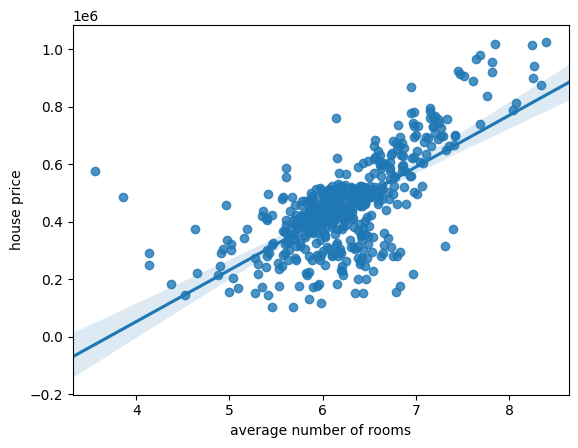

In [20]:
sb.regplot(data = df1, x = 'rooms', y = 'price');
plt.xlabel("average number of rooms");
plt.ylabel("house price");

# the increasing  in number of rooms reflect how large the house is and that will increae the price of the house

# services VS price

In [21]:
serv_vs_price=%sql SELECT PTRATIO as service,MEDV as price FROM house_p;
df2 = serv_vs_price.DataFrame()
df2.head()

 * ibm_db_sa://vvc90062:***@55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31929/BLUDB
Done.


,service,price
0,15.3,504000.0
1,17.8,453600.0
2,17.8,728700.0
3,18.7,701400.0
4,18.7,760200.0


In [22]:
df2.corr()

,service,price
service,1.000000,-0.519034
price,-0.519034,1.000000


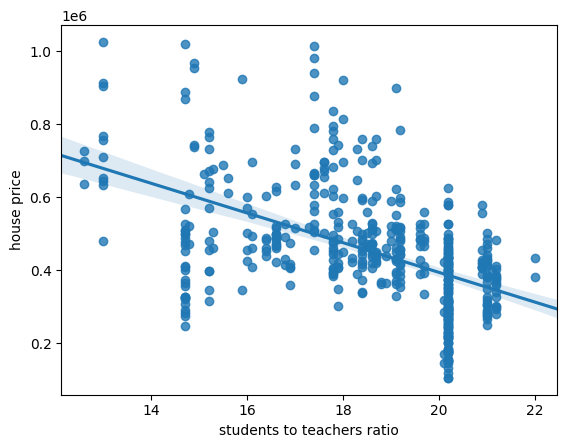

In [23]:
sb.regplot(data = df2, x = 'service', y = 'price');
plt.xlabel("students to teachers ratio");
plt.ylabel("house price");

# increasing in students to teachers ratio reflect that the decrease of number of schools and that means school service in this area is not so good and that will effect badly on the price of the house in this neighburhood

# lower class areas vs Price

In [24]:
lowcls_vs_price=%sql SELECT LSTAT as low_class,MEDV as price FROM house_p;
df3 = lowcls_vs_price.DataFrame()
df3.head()

 * ibm_db_sa://vvc90062:***@55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31929/BLUDB
Done.


,low_class,price
0,4.98,504000.0
1,9.14,453600.0
2,4.03,728700.0
3,2.94,701400.0
4,5.33,760200.0


In [25]:
df3.corr()

,low_class,price
low_class,1.00000,-0.76067
price,-0.76067,1.00000


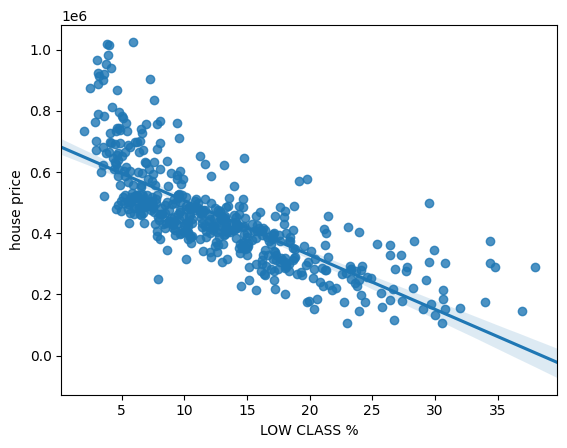

In [26]:
sb.regplot(data = df3, x = 'low_class', y = 'price');
plt.xlabel("LOW CLASS %");
plt.ylabel("house price");

# increasing of the percentage of homeowners in the neighborhood considered "lower class" (working poor) will decrease the value of th house which will be considered a house in local area not a rich one

# Task 2 :
## what is your suggestion to imporve the value of low class areas in 10 years ?

## Lower class areas vs services


In [27]:
lowcls_vs_service=%sql SELECT LSTAT as low_class,PTRATIO as service FROM house_p;
df4 = lowcls_vs_service.DataFrame()
df4.head()

 * ibm_db_sa://vvc90062:***@55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31929/BLUDB
Done.


,low_class,service
0,4.98,15.3
1,9.14,17.8
2,4.03,17.8
3,2.94,18.7
4,5.33,18.7


In [28]:
df4.corr()

,low_class,service
low_class,1.000000,0.360445
service,0.360445,1.000000


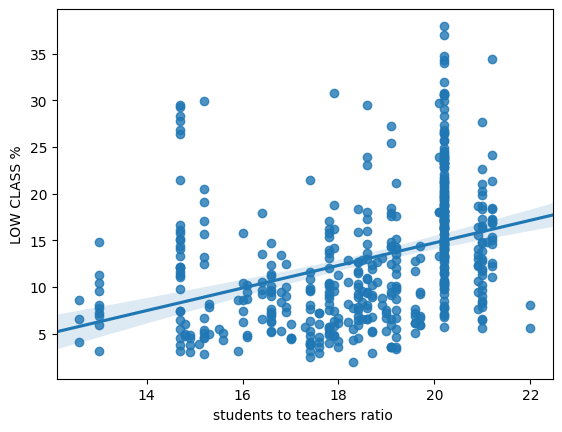

In [29]:
sb.regplot(data = df4, y = 'low_class', x = 'service');
plt.ylabel("LOW CLASS %");
plt.xlabel("students to teachers ratio ");

## increasing in students to teachers ration reflect  the decrease of number of schools and that means school service in this area is not so good and that will increase only in poor  areas where education service has low quality

# solution 1:
### * the increaing of services will increae the value of houses and that will decrease percentage of homeowners in the neighborhood considered "lower class" in 10 years

## Lower class areas vs number of rooms

In [30]:
lowcls_vs_rooms=%sql SELECT LSTAT as low_class,RM as rooms FROM house_p;
df5 = lowcls_vs_rooms.DataFrame()
df5.head()

 * ibm_db_sa://vvc90062:***@55fbc997-9266-4331-afd3-888b05e734c0.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31929/BLUDB
Done.


,low_class,rooms
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [31]:
df5.corr()

,low_class,rooms
low_class,1.000000,-0.612033
rooms,-0.612033,1.000000


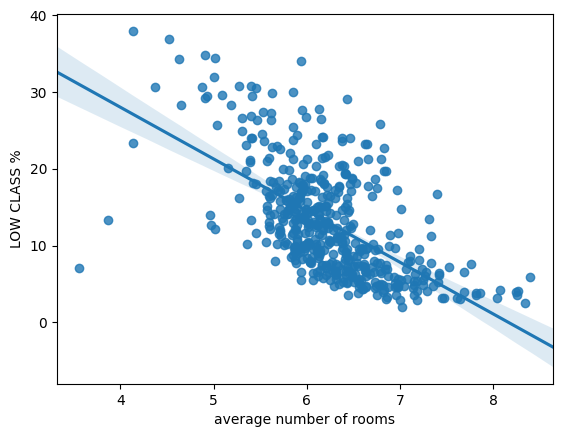

In [32]:
sb.regplot(data = df5, y = 'low_class', x = 'rooms');
plt.ylabel("LOW CLASS %");
plt.xlabel("average number of rooms");

# solution 2:
## *bulding large houses in local areas with more than 5 rooms will Encourage rich people to buy houses in these poor areas with cheap prices and that will decrease the the percentage of poor people in this area in 10 years and increase the value of houses too